In [ ]:
!unzip "./mle.zip"

Archive:  ./mle.zip
replace MachineLearningEngineerTest/Java/resources/1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [ ]:
!pip install tensorflow==2.7
!pip install tensorflow_text
!pip install tensorflow_hub
!pip install transformers
!pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.7.0-cp39-cp39-manylinux2010_x86_64.whl (489.7 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0
    Uninstalling tensorflow-2.12.0:
      Successfully uninstalled tensorflow-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers.legacy import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import TFBertForSequenceClassification, BertTokenizer
from official.nlp.data import classifier_data_lib
from official.nlp import optimization
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as plt

In [ ]:
NUM_CLASSES = 5
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

In [ ]:
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100
EARLY_STOP_PATIENCE = 3
base_path = './MachineLearningEngineerTest/ML/data'

In [ ]:
def generator(set_type, TARGET_SIZE, BATCH_SIZE, CLASSES):
    data_dir = base_path + '/images' + set_type
    return ImageDataGenerator(rescale = 1.0/255.0).flow_from_directory(data_dir,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    classes = CLASSES)


TARGET_SIZE = (256, 256)
BATCH_SIZE = 32
CLASSES = ['0', '2', '4', '6', '9']

train_generator = generator('/train', TARGET_SIZE, BATCH_SIZE,
                            CLASSES)
validation_generator = generator('/test', TARGET_SIZE, BATCH_SIZE,
                                 CLASSES)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.7, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = './best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs = 30,
        validation_data=validation_generator,
        validation_steps=10,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights("./best.hdf5")

<ipython-input-228-c773e94d7d93>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/30
50/50 [==============================] - 25s 482ms/step - loss: 1.5620 - accuracy: 0.3018 - val_loss: 1.5739 - val_accuracy: 0.2969
Epoch 2/30
50/50 [==============================] - 12s 224ms/step - loss: 1.5009 - accuracy: 0.3550 - val_loss: 1.3784 - val_accuracy: 0.5219
Epoch 3/30
50/50 [==============================] - 8s 162ms/step - loss: 1.3982 - accuracy: 0.4173 - val_loss: 1.4326 - val_accuracy: 0.4969
Epoch 4/30
50/50 [==============================] - 10s 210ms/step - loss: 1.2873 - accuracy: 0.4741 - val_loss: 1.2836 - val_accuracy: 0.4750
Epoch 5/30
50/50 [==============================] - 9s 187ms/step - loss: 1.0983 - accuracy: 0.5606 - val_loss: 0.9612 - val_accuracy: 0.6500
Epoch 6/30
50/50 [==============================] - 10s 200ms/step - loss: 1.0074 - accuracy: 0.5985 - val_loss: 0.9196 - val_accuracy: 0.6438
Epoch 7/30
50/50 [==============================] - 9s 184ms/step - loss: 0.9117 - accuracy: 0.6420 - val_loss: 0.8784 - val_accuracy: 0.6906
Ep

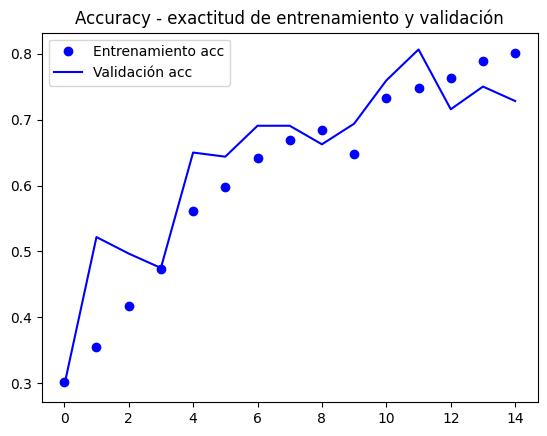

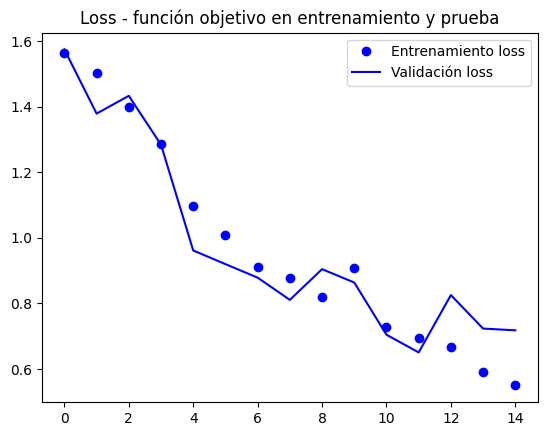

In [ ]:
acc      = fit_history.history['accuracy']
val_acc  = fit_history.history['val_accuracy']
loss     = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

In [ ]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable = True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  encoder_inputs = bert_preprocess(text_input)
  outputs = bert_encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Flatten()(net)
  net = tf.keras.layers.Dense(64, activation='relu')(net)
  net = tf.keras.layers.Dense(5, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


In [ ]:
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=2, batch_size = 32)

In [ ]:
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)
# model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
def generator(set_type, BATCH_SIZE, CLASSES):
    data_dir = base_path + '/ocr' + set_type
    return tf.keras.utils.text_dataset_from_directory(
        data_dir,
        class_names=CLASSES,
        batch_size=BATCH_SIZE,
    )
BATCH_SIZE = 32
CLASSES = ['0', '2', '4', '6', '9']

text_train_generator = generator('/train', BATCH_SIZE,
                            CLASSES)
text_validation_generator = generator('/test', BATCH_SIZE,
                                 CLASSES)

Found 2000 files belonging to 5 classes.
Found 500 files belonging to 5 classes.


In [ ]:
learning_rate = 2e-5

In [ ]:
# model_text = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [ ]:
epochs = 15
steps_per_epoch = tf.data.experimental.cardinality(text_train_generator).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 0.07
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

classifier_model.compile(optimizer=optimizer,
 loss = loss,
 metrics= metric)

In [ ]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = './best_text.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
fit_history_text = classifier_model.fit_generator(
        text_train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs = epochs,
        validation_data=text_validation_generator,
        validation_steps=10,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
classifier_model.load_weights("./best_text.hdf5")

Epoch 1/15


<ipython-input-262-b09f675841fb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history_text = classifier_model.fit_generator(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 34s 511ms/step - loss: 1.3978 - accuracy: 0.4795 - val_loss: 1.9660 - val_accuracy: 0.3906
Epoch 2/15
63/63 [==============================] - 32s 501ms/step - loss: 1.4957 - accuracy: 0.4775 - val_loss: 1.5007 - val_accuracy: 0.4031
Epoch 3/15
63/63 [==============================] - 30s 480ms/step - loss: 1.5439 - accuracy: 0.4380 - val_loss: 1.4091 - val_accuracy: 0.4125
Epoch 4/15
63/63 [==============================] - 30s 476ms/step - loss: 1.4496 - accuracy: 0.4535 - val_loss: 1.3606 - val_accuracy: 0.4906
Epoch 5/15
63/63 [==============================] - 30s 485ms/step - loss: 1.2123 - accuracy: 0.5360 - val_loss: 0.9876 - val_accuracy: 0.5938
Epoch 6/15
63/63 [==============================] - 29s 456ms/step - loss: 1.2198 - accuracy: 0.5205 - val_loss: 1.3652 - val_accuracy: 0.3750
Epoch 7/15
63/63 [==============================] - 29s 461ms/step - loss: 1.3282 - accuracy: 0.4115 - val_loss: 1.4282 - val_accuracy: 0.3844
Epoch 8/15

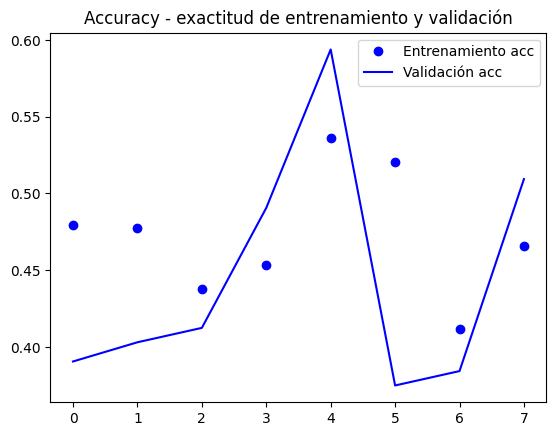

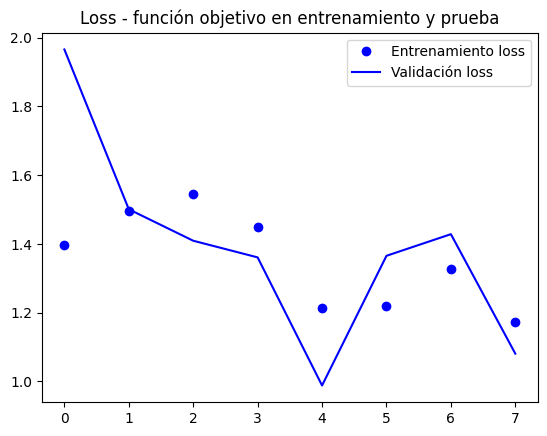

In [ ]:
acc      = fit_history_text.history['accuracy']
val_acc  = fit_history_text.history['val_accuracy']
loss     = fit_history_text.history['loss']
val_loss = fit_history_text.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

In [ ]:
def prediction(image, text):
  img = cv2.resize(cv2.imread(image), (256, 256))
  txt = open(text,'r')
  print(model.predict(img))
  print(classifier_model.predict(txt))
  return 0
print(prediction('./0c3216d7-5505-4a16-bec7-7199fa181aae.TIF', './0c3216d7-5505-4a16-bec7-7199fa181aae.TIF.txt'))